# Accessing data from books

```{attention}
This guide is currently under development. For more information and discussion see [the list of issues](https://github.com/wragge/trove-data-guide/issues) on GitHub. Comments are welcome.
```

## Metadata

There seem to be a lot of duplicate records -- Libraries Australia and Trove DL (why not merged?)

- work records (via search and `/work/` endpoints)
- embedded metadata
    - pages (number of pages important for text, images, pdf)
    - chapters?
- lists of items in collections

Create datasets

Pre-harvested datasets -- digitised books with OCR

Search and formats/categories

Facets -- eg language? (but usual work/version problems)

## Text

Some in API but not all and limits on length -- don't use!

Once you have number of pages can download --> how to

Pre-harvested datasets

You can get text via the API, but you have to add `include=workversions` then loop through versions, looking in the `description` field for a `value` with `"type": "open_fulltext"`.

I think there are limits on the amount of text you can get from the API -- need to test this.

In [3]:
import requests
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/GLAM-Workbench/trove-books-data/main/trove-books.csv", keep_default_na=False)



5976    https://nla.gov.au/nla.obj-71022227
Name: fulltext_url, dtype: object

https://nla.gov.au/nla.obj-3235153041
https://nla.gov.au/nla.obj-3235153041/download?downloadOption=ocr&firstPage=0&lastPage=139


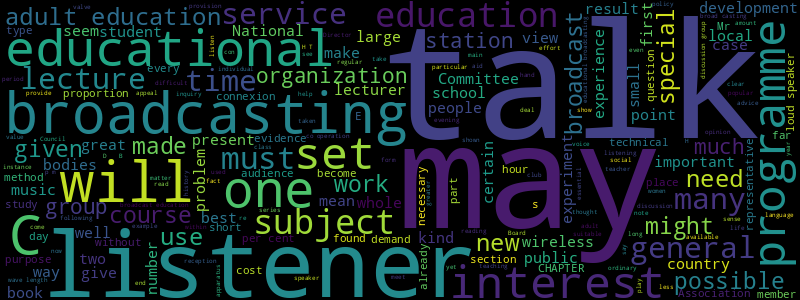

In [48]:
from wordcloud import WordCloud
from io import BytesIO

book = df.loc[(df["text_file"] != "") & (df["pages"] > 50) & (df["language"].str.contains("English"))].sample(1)
nla_id = book["fulltext_url"].iloc[0]
print(nla_id)
pages = book["pages"].iloc[0]

params = {
    "downloadOption": "ocr",
    "firstPage": 0,
    "lastPage": pages - 1
}

response = requests.get(f"{nla_id}/download", params=params)
print(response.url)
#print(response.text)
wc = WordCloud(width=800, height=300)
# just using response.text with wordcloud seems to cause encoding problems
# using BytesIO and response.content seems to work ok
wc.generate(BytesIO(response.content).getvalue().decode('UTF-8'))
wc.to_image()

## Images and PDF

Once you have number of pages can download --> how to

Some allow view but not download: https://nla.gov.au/nla.obj-2490195342/view

## Oddities

This is a collection, but instead of the items in the collection having their own work records, they're versions of the work. This makes it hard to get at the individual items via the API.

https://trove.nla.gov.au/work/12938999/